In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf

mpl.style.use("seaborn")

# Fetch Data

In [2]:
#dim ethin
dim = 38

n_electrons = 14

In [3]:
from SCFInitialGuess.utilities.dataset import make_butadien_dataset, extract_triu

def load_triu(S, P, dim):
    
    return [extract_triu(s, dim) for s in S], [extract_triu(p, dim) for p in P]

dataset, molecules = make_butadien_dataset(
    np.load("molecules_ethin_6-31g**.npy"),
    *load_triu(*np.load("dataset_ethin_6-31g**.npy"), dim), 
)

[-] 2018-05-01 12:49:51: Data set normalized. Mean value std: 0.02655487899377967


# Ethin
dim = 38

dim^2 = 2304

dim_ut = 1176

In [4]:
dim_triu = int(dim * (dim + 1) / 2)

In [12]:
from SCFInitialGuess.nn.networks import EluFixedValue

graph = tf.Graph()

structure, weights, biases = np.load("network_ethin.npy", encoding="latin1")

with graph.as_default():
    sess = tf.Session()
    network = EluFixedValue(structure, weights, biases)
    network.setup()
    sess.run(tf.global_variables_initializer())

In [13]:
p = network.run(sess, dataset.testing[0])

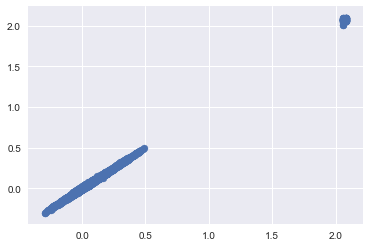

In [14]:
plt.scatter(
    dataset.testing[1],
    p
)
plt.show()

In [15]:
from SCFInitialGuess.utilities.analysis import mf_initializer, measure_all_quantities, make_results_str

results = measure_all_quantities(
    p,
    dataset,
    molecules[1],
    n_electrons,
    mf_initializer,
    dim,
    True
)

/home/jo/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/jo/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


[ ] 2018-05-01 12:59:50: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 12:59:50: Iteration calculation: 1
[ ] 2018-05-01 12:59:51: Iteration calculation: 2


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 12:59:51: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 12:59:51: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 12:59:52: Iteration calculation: 5
[ ] 2018-05-01 12:59:52: Iteration calculation: 6


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 12:59:52: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 12:59:53: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 12:59:53: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 12:59:54: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 12:59:54: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 12:59:54: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 12:59:55: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 12:59:55: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 12:59:55: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 12:59:56: Iteration calculation: 16


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 12:59:56: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 12:59:56: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 12:59:57: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 12:59:57: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 12:59:57: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 12:59:58: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 12:59:58: Iteration calculation: 23


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 12:59:58: Iteration calculation: 24
[ ] 2018-05-01 12:59:58: Iteration calculation: 25


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 12:59:59: Iteration calculation: 26


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 12:59:59: Iteration calculation: 27


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 12:59:59: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 12:59:59: Iteration calculation: 29


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:00: Iteration calculation: 30


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:00: Iteration calculation: 31


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:00: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:00: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:01: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:01: Iteration calculation: 35


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:01: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:02: Iteration calculation: 37


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:02: Iteration calculation: 38


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:02: Iteration calculation: 39
[ ] 2018-05-01 13:00:02: Iteration calculation: 40


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:03: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:03: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:03: Iteration calculation: 43
[ ] 2018-05-01 13:00:04: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:04: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:05: Iteration calculation: 46
[ ] 2018-05-01 13:00:05: Iteration calculation: 47


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:06: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:06: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [16]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
2.02470E-03 +- 3.40389E-04
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
2.88336E-03 +- 3.81973E-04
--- Occupance Error ---
6.81431E-02 +- 4.76646E-02
--- Avg. Iterations ---
1.89600E+01 +- 6.17077E+00



## McWheeny that shit

In [17]:
def mc_wheeny_purification(p,s):
    return (3 * np.dot(np.dot(p, s), p) - np.dot(np.dot(np.dot(np.dot(p, s), p), s), p)) / 2

def multi_mc_wheeny(p, s, n_max=4):
    for i in range(n_max):
        p = mc_wheeny_purification(p, s)
    return p

In [18]:
from SCFInitialGuess.utilities.dataset import make_matrix_batch
s_raw = make_matrix_batch(dataset.inverse_input_transform(dataset.testing[0]), dim, True)
p_batch = make_matrix_batch(p, dim, True)

In [19]:
p_mcw1 = np.array(list(map(lambda x: multi_mc_wheeny(x[0], x[1], n_max=1), zip(p_batch, s_raw))))
p_mcw5 = np.array(list(map(lambda x: multi_mc_wheeny(x[0], x[1], n_max=5), zip(p_batch, s_raw))))

In [20]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_mcw1)),
    dataset,
    molecules[1],
    n_electrons,
    mf_initializer,
    dim,
    True
)

[ ] 2018-05-01 13:00:07: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:08: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:08: Iteration calculation: 2
[ ] 2018-05-01 13:00:09: Iteration calculation: 3


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:09: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:10: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:10: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:11: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:11: Iteration calculation: 8
[ ] 2018-05-01 13:00:12: Iteration calculation: 9


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:12: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:13: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:13: Iteration calculation: 12
[ ] 2018-05-01 13:00:14: Iteration calculation: 13


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:14: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:15: Iteration calculation: 15
[ ] 2018-05-01 13:00:15: Iteration calculation: 16


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:16: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:16: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:17: Iteration calculation: 19
[ ] 2018-05-01 13:00:17: Iteration calculation: 20
[ ] 2018-05-01 13:00:18: Iteration calculation: 21


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:18: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:19: Iteration calculation: 23
[ ] 2018-05-01 13:00:19: Iteration calculation: 24


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:20: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:20: Iteration calculation: 26


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:20: Iteration calculation: 27


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:21: Iteration calculation: 28
[ ] 2018-05-01 13:00:21: Iteration calculation: 29


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:22: Iteration calculation: 30
[ ] 2018-05-01 13:00:22: Iteration calculation: 31


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:23: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:23: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:24: Iteration calculation: 34
[ ] 2018-05-01 13:00:24: Iteration calculation: 35


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:25: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:25: Iteration calculation: 37
[ ] 2018-05-01 13:00:25: Iteration calculation: 38


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:26: Iteration calculation: 39


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:26: Iteration calculation: 40


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:27: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:28: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:28: Iteration calculation: 43
[ ] 2018-05-01 13:00:28: Iteration calculation: 44


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:29: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:29: Iteration calculation: 46


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:30: Iteration calculation: 47


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:30: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:31: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [21]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
1.35166E-03 +- 3.22173E-04
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
7.02395E-05 +- 2.32827E-05
--- Occupance Error ---
4.32471E-03 +- 2.74508E-03
--- Avg. Iterations ---
1.88600E+01 +- 6.11232E+00



In [22]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_mcw5)),
    dataset,
    molecules[1],
    n_electrons,
    mf_initializer,
    dim,
    True
)

[ ] 2018-05-01 13:00:32: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:32: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:33: Iteration calculation: 2
[ ] 2018-05-01 13:00:33: Iteration calculation: 3


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:34: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:35: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:35: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:36: Iteration calculation: 7
[ ] 2018-05-01 13:00:36: Iteration calculation: 8


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:36: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:37: Iteration calculation: 10
[ ] 2018-05-01 13:00:37: Iteration calculation: 11


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:38: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:39: Iteration calculation: 13
[ ] 2018-05-01 13:00:39: Iteration calculation: 14


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:39: Iteration calculation: 15
[ ] 2018-05-01 13:00:40: Iteration calculation: 16


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:40: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:41: Iteration calculation: 18
[ ] 2018-05-01 13:00:41: Iteration calculation: 19


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:41: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:42: Iteration calculation: 21
[ ] 2018-05-01 13:00:42: Iteration calculation: 22


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:43: Iteration calculation: 23
[ ] 2018-05-01 13:00:43: Iteration calculation: 24


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:44: Iteration calculation: 25
[ ] 2018-05-01 13:00:44: Iteration calculation: 26


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:45: Iteration calculation: 27


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:45: Iteration calculation: 28
[ ] 2018-05-01 13:00:46: Iteration calculation: 29


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:46: Iteration calculation: 30
[ ] 2018-05-01 13:00:46: Iteration calculation: 31


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:47: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:47: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:48: Iteration calculation: 34
[ ] 2018-05-01 13:00:48: Iteration calculation: 35


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:49: Iteration calculation: 36
[ ] 2018-05-01 13:00:49: Iteration calculation: 37


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:50: Iteration calculation: 38


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:50: Iteration calculation: 39


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:51: Iteration calculation: 40


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:51: Iteration calculation: 41
[ ] 2018-05-01 13:00:52: Iteration calculation: 42
[ ] 2018-05-01 13:00:52: Iteration calculation: 43


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:52: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:53: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:54: Iteration calculation: 46
[ ] 2018-05-01 13:00:54: Iteration calculation: 47


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:55: Iteration calculation: 48


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:00:55: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [23]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
1.35086E-03 +- 3.22979E-04
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
2.75288E-17 +- 3.55260E-18
--- Occupance Error ---
1.74083E-15 +- 1.44268E-15
--- Avg. Iterations ---
1.88600E+01 +- 6.11232E+00



## Classical Ethan

In [24]:
from pyscf.scf import hf

p_sap = [hf.init_guess_by_atom(mol.get_pyscf_molecule()) for mol in molecules[1]]
p_minao = [hf.init_guess_by_minao(mol.get_pyscf_molecule()) for mol in molecules[1]]
p_gwh = [hf.init_guess_by_wolfsberg_helmholtz(mol.get_pyscf_molecule()) for mol in molecules[1]]

Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs s

In [25]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_sap)),
    dataset,
    molecules[1],
    n_electrons,
    mf_initializer,
    dim,
    True
)

Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:35: Iteration calculation: 0
[ ] 2018-05-01 13:01:36: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:37: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:37: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:38: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:39: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:39: Iteration calculation: 6
[ ] 2018-05-01 13:01:39: Iteration calculation: 7


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:40: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:40: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:41: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:42: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:43: Iteration calculation: 12
[ ] 2018-05-01 13:01:43: Iteration calculation: 13


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:44: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:45: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:45: Iteration calculation: 16


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:46: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:47: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:48: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:48: Iteration calculation: 20
[ ] 2018-05-01 13:01:49: Iteration calculation: 21


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:49: Iteration calculation: 22
[ ] 2018-05-01 13:01:50: Iteration calculation: 23


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:51: Iteration calculation: 24


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:51: Iteration calculation: 25
[ ] 2018-05-01 13:01:52: Iteration calculation: 26


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:52: Iteration calculation: 27


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:53: Iteration calculation: 28
[ ] 2018-05-01 13:01:53: Iteration calculation: 29


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:54: Iteration calculation: 30


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:54: Iteration calculation: 31


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:55: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:55: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:56: Iteration calculation: 34
[ ] 2018-05-01 13:01:56: Iteration calculation: 35


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:56: Iteration calculation: 36
[ ] 2018-05-01 13:01:57: Iteration calculation: 37


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:57: Iteration calculation: 38
[ ] 2018-05-01 13:01:58: Iteration calculation: 39


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:58: Iteration calculation: 40


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:58: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:59: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:59: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:01:59: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:00: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:00: Iteration calculation: 46


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:00: Iteration calculation: 47


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:01: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:01: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [26]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
2.30560E-02 +- 1.43228E-03
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
2.20169E-02 +- 1.59134E-03
--- Occupance Error ---
2.70006E-15 +- 2.28150E-15
--- Avg. Iterations ---
2.40000E+01 +- 1.14053E+01



In [27]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_minao)),
    dataset,
    molecules[1],
    n_electrons,
    mf_initializer,
    dim,
    True
)

[ ] 2018-05-01 13:02:01: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:02: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:02: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:02: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:03: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:03: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:03: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:03: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:04: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:04: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:04: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:05: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:05: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:05: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:05: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:06: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:06: Iteration calculation: 16


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:06: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:07: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:07: Iteration calculation: 19
[ ] 2018-05-01 13:02:07: Iteration calculation: 20


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:08: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:08: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:08: Iteration calculation: 23


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:09: Iteration calculation: 24


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:09: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:09: Iteration calculation: 26


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:09: Iteration calculation: 27


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:10: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:10: Iteration calculation: 29


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:10: Iteration calculation: 30


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:10: Iteration calculation: 31


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:11: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:11: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:11: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:11: Iteration calculation: 35


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:12: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:12: Iteration calculation: 37
[ ] 2018-05-01 13:02:12: Iteration calculation: 38

Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args



[ ] 2018-05-01 13:02:12: Iteration calculation: 39


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:12: Iteration calculation: 40


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:13: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:13: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:13: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:13: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:14: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:14: Iteration calculation: 46


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:14: Iteration calculation: 47


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:15: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:15: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [28]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
2.14954E-02 +- 1.67818E-03
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
2.18115E-02 +- 1.93107E-03
--- Occupance Error ---
1.29067E-02 +- 5.11737E-05
--- Avg. Iterations ---
2.38400E+01 +- 1.14985E+01



In [29]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_gwh)),
    dataset,
    molecules[1],
    n_electrons,
    mf_initializer,
    dim,
    True
)

[ ] 2018-05-01 13:02:16: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:16: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:17: Iteration calculation: 2
[ ] 2018-05-01 13:02:17: Iteration calculation: 3


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:18: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:18: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:19: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:19: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:20: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:21: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:21: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:22: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:23: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:23: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:24: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:25: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:25: Iteration calculation: 16


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:26: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:27: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:28: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:29: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:29: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:29: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:31: Iteration calculation: 23


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:31: Iteration calculation: 24


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:32: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:32: Iteration calculation: 26


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:33: Iteration calculation: 27


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:34: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:35: Iteration calculation: 29


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:35: Iteration calculation: 30


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:35: Iteration calculation: 31


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:36: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:36: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:37: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:38: Iteration calculation: 35


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:38: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:39: Iteration calculation: 37


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:39: Iteration calculation: 38


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:40: Iteration calculation: 39


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:40: Iteration calculation: 40


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:41: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:41: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:42: Iteration calculation: 43
[ ] 2018-05-01 13:02:42: Iteration calculation: 44


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:43: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:44: Iteration calculation: 46


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:44: Iteration calculation: 47
[ ] 2018-05-01 13:02:45: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:02:46: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [30]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
1.60721E-02 +- 2.26511E-03
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
5.49261E-17 +- 1.27846E-17
--- Occupance Error ---
4.40536E-15 +- 3.28006E-15
--- Avg. Iterations ---
2.55600E+01 +- 1.05928E+01

